In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import torch

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [67]:
from sklearn.metrics import mean_squared_error

In [71]:
mean_squared_error(train['y'].values, np.repeat(np.mean(train['y'].values), len(train)))

309.5350639114965

In [101]:
X_train = Variable(torch.FloatTensor(train.values[:, :10]))
y_train = Variable(torch.FloatTensor(train['y'].values))

In [85]:
X.shape

torch.Size([24000, 10])

In [86]:
(torch.matmul((torch.matmul(X, A1) + b1), A2) + b2).reshape(-1).shape

torch.Size([24000])

In [89]:
from IPython.display import clear_output

In [94]:
def predict(X, params):
    A1, b1, A2, b2 = params 
    Z = torch.cos(torch.matmul(X, A1) + b1)
    return (torch.matmul(Z, A2) + b2).reshape(-1)

In [95]:
def mse(X, y, params):
    return torch.mean((predict(X, params) - y) ** 2) 

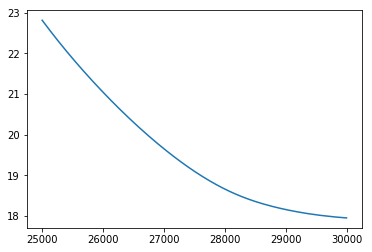

In [110]:
A1 = Variable(torch.FloatTensor(np.random.random((10, 2))), requires_grad=True)
b1 = Variable(torch.FloatTensor(np.random.random((2))), requires_grad=True)
A2 = Variable(torch.FloatTensor(np.random.random((2, 1))), requires_grad=True)
b2 = Variable(torch.FloatTensor(np.random.random(1)), requires_grad=True)
params = [A1, b1, A2, b2]
losses = []
opt = torch.optim.Adam(params, lr=1e-3)

for i in range(30000):
    loss = mse(X_train, y_train, params)
    loss.backward()
    opt.step()
    opt.zero_grad()
    losses.append(loss.data.numpy())
    # the rest of code is just bells and whistles
    if (i + 1) % 100 == 0:
        clear_output(True)
        last_losses = losses[-5000:]
        plt.plot(list(range(i - len(last_losses) + 1, i + 1)), losses[-5000:])
        plt.show()

In [104]:
X_test = Variable(torch.FloatTensor(test.values[:, :10]))
y_test = Variable(torch.FloatTensor(test['y'].values))

In [105]:
mse(X_test, y_test, params)

tensor(17.8230, grad_fn=<MeanBackward1>)

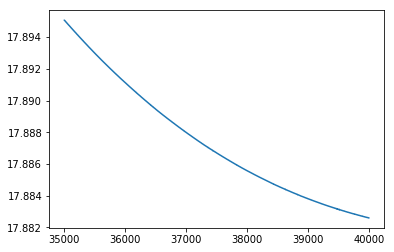

In [111]:
opt2 = torch.optim.Adam(params, lr=1e-4)

for i in range(30000, 40000):
    loss = mse(X_train, y_train, params)
    loss.backward()
    opt2.step()
    opt2.zero_grad()
    losses.append(loss.data.numpy())
    # the rest of code is just bells and whistles
    if (i + 1) % 100 == 0:
        clear_output(True)
        last_losses = losses[-5000:]
        plt.plot(list(range(i - len(last_losses) + 1, i + 1)), losses[-5000:])
        plt.show()

In [112]:
mse(X_test, y_test, params)

tensor(17.7825, grad_fn=<MeanBackward1>)

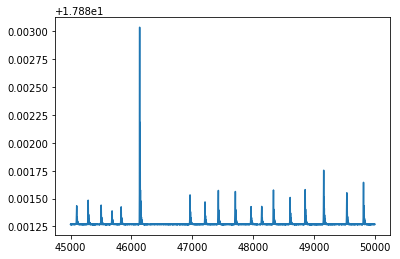

In [113]:
A1_ = Variable(torch.FloatTensor(np.random.random((10, 2))), requires_grad=True)
b1_ = Variable(torch.FloatTensor(np.random.random((2))), requires_grad=True)
A2_ = Variable(torch.FloatTensor(np.random.random((2, 1))), requires_grad=True)
b2_ = Variable(torch.FloatTensor(np.random.random(1)), requires_grad=True)
params2 = [A1_, b1_, A2_, b2_]
losses2 = []
opt3 = torch.optim.Adam(params2, lr=1e-3)

for i in range(50000):
    loss = mse(X_train, y_train, params2)
    loss.backward()
    opt3.step()
    opt3.zero_grad()
    losses2.append(loss.data.numpy())
    # the rest of code is just bells and whistles
    if (i + 1) % 100 == 0:
        clear_output(True)
        last_losses = losses2[-5000:]
        plt.plot(list(range(i - len(last_losses) + 1, i + 1)), losses2[-5000:])
        plt.show()

In [115]:
mse(X_test, y_test, params2)

tensor(17.7843, grad_fn=<MeanBackward1>)

In [120]:
a

array([[ 14.56,  15.13],
       [ -0.16,   0.28],
       [ -9.93, -10.24],
       [ 14.49,  14.14],
       [-11.43, -11.26],
       [ -8.67,  -8.18],
       [ 14.86,  14.76]])